# CNN Visualization

컨볼루션 레이어의 이해를 돕기 위한 시각화 예제입니다.

---

## 컨볼루션 레이어 구성

- Convolution layer
- Pooling layer
- Fully Connected layer

---

## 1. 컨볼루션 레이어 (Convolution layer)

### 컨볼루션 연산 (Convolution Operation)

합성곱, 또는 컨볼루션 연산은 주어진 입력에 대해 주변의 모든 입력의 가중 평균으로 다시 추정하는 방법입니다.

- $*$ 은 컨볼루션 연산을 나타낸다.
- Kernel = Filter = Feature detector 등 다양하게 불립니다.
- 필터는 일반적으로 $3 \times 3$을 사용되지만, 정해진 규격은 없습니다.
- 필터는 이미지에서 세로 혹은 가로 라인과 볼록한 모양을 탐지합니다.

![image](https://anhreynolds.com/img/cnn.png)

### 보폭 (Stride)

스트라이드는 컨볼루션의 각 단계에서 얼마만큼의 보폭으로 이동하는지를 결정한다. 일반적으로 1을 사용한다.

![image](https://miro.medium.com/max/1400/1*g0OmDI1w9KqN7Rpw6Qo8Xg@2x.gif)

### 패딩(Padding)

입력으로 들어온 이미지의 크기는 컨볼루션 레이어를 거치면서 줄어들게 됩니다. 또한, 원본 이미지의 가장자리는 중심 픽셀만큼 자주 컨볼루션 연산에 사용되지 않기 때문에 연산과정에서 중요한 정보가 손실될 수도 있습니다. 이러한 문제에 대한 해결 방법으로 원본 이미지의 테두리를 0으로 채우는 것입니다.

![image](https://anhreynolds.com/img/padding.png)

---

## 2. 활성화 함수 (Activation layer)

활성화 함수는 신경망의 출력값을 비선형적으로 변형시키는 역활을 합니다.

![image](https://miro.medium.com/max/1192/1*4ZEDRpFuCIpUjNgjDdT2Lg.png)
---

## 3. 풀링 레이어 (Pooling layer)

### 풀링 연산 (Pooling Operation)

풀링은 중요한 특징(Feature)들은 유지하면서 특징 맵(Feature Map)의 크기를 줄여서 연산의 복잡도를 줄이는 방법입니다.

![image](https://miro.medium.com/max/1400/0*WuoWo2b-wI8Dyhdr.png)

## 이미지 가져오기

In [ ]:
from google.colab import files

#uploaded = files.upload()

!wget https://dimg.donga.com/wps/NEWS/IMAGE/2022/01/28/111500268.2.jpg

--2024-11-06 06:18:37--  https://dimg.donga.com/wps/NEWS/IMAGE/2022/01/28/111500268.2.jpg
Resolving dimg.donga.com (dimg.donga.com)... 1.248.254.70, 1.248.254.84, 1.248.254.68
Connecting to dimg.donga.com (dimg.donga.com)|1.248.254.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31357 (31K) [image/jpeg]
Saving to: ‘111500268.2.jpg’

111500268.2.jpg     100%[===================>]  30.62K   185KB/s    in 0.2s    

2024-11-06 06:18:38 (185 KB/s) - ‘111500268.2.jpg’ saved [31357/31357]



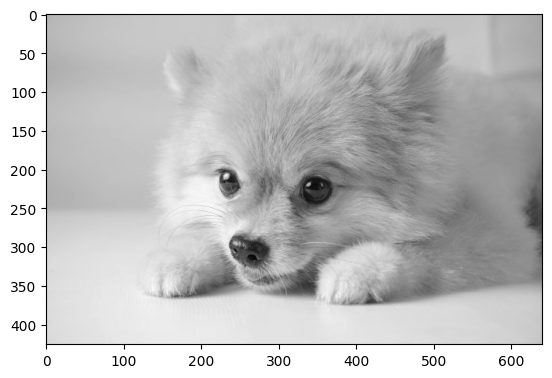

In [ ]:
import matplotlib.pyplot as plt
import glob
import cv2
%matplotlib inline

path = '/content/'
ext = ['png', 'jpg', 'jpeg', 'gif']

files = []
[files.extend(glob.glob(path + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]

for index in range(len(images)):
    image = images[index]
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = img.astype('float32') / 255
    images[index] = img

    plt.imshow(img, cmap='gray')
    plt.show()

## 필터 정의 및 시각화

![image](https://t1.daumcdn.net/cfile/tistory/99C294445BA04BA70C)

In [ ]:
import numpy as np

# 필터 정의
filter_vals = np.array([[-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1]])

print('필터의 형상: ', filter_vals.shape)

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print('\n')
print('필터 1: \n', filter_1)
print('필터 2: \n', filter_2)
print('필터 3: \n', filter_3)
print('필터 4: \n', filter_4)

필터의 형상:  (4, 4)


필터 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
필터 2: 
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]
필터 3: 
 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]
필터 4: 
 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


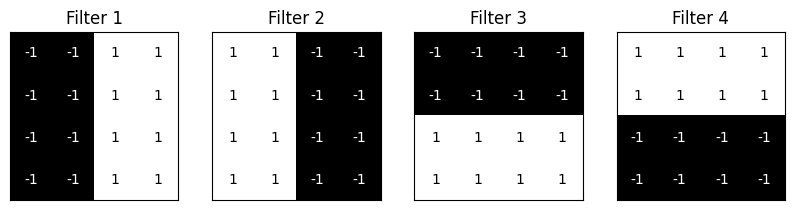

In [ ]:
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

## 컨볼루션 레이어 정의

위에서 생선한 필터를 포함하도록 단일 컨볼루션 레이어를 초기화합니다.   
본 예제에서는 네트워크를 훈련하는 것이 아니라, 네트워크에서 순방향 전달 후에 어떤 일이 발생하는지 시각화할 수 있도록 컨볼루션 계층에서 가중치를 초기화합니다.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self, weight):
        super(Net, self).__init__()

        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(in_channels=1,
                              out_channels=4,
                              kernel_size=(k_height, k_width),
                              stride=1,
                              padding='same',
                              bias=False)

        self.conv.weight = torch.nn.Parameter(weight)

        self.pool = nn.MaxPool2d(4, 4)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)

        # returns both layers
        return conv_x, activated_x, pooled_x

# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
print(weight.shape)
model = Net(weight)

# print out the layer in the network
print(model)

torch.Size([4, 1, 4, 4])
Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), padding=same, bias=False)
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
)


In [ ]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:549: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1036.)
  return F.conv2d(


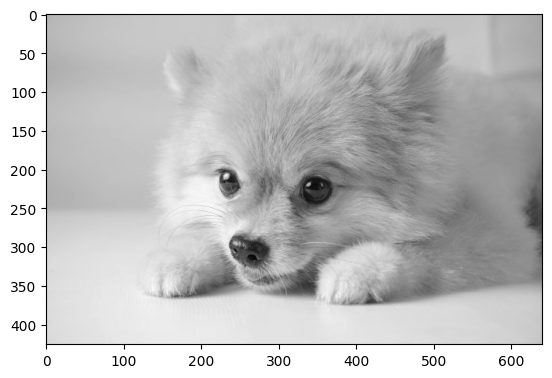

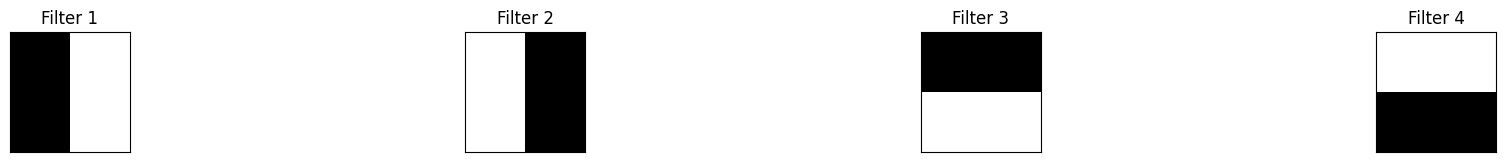

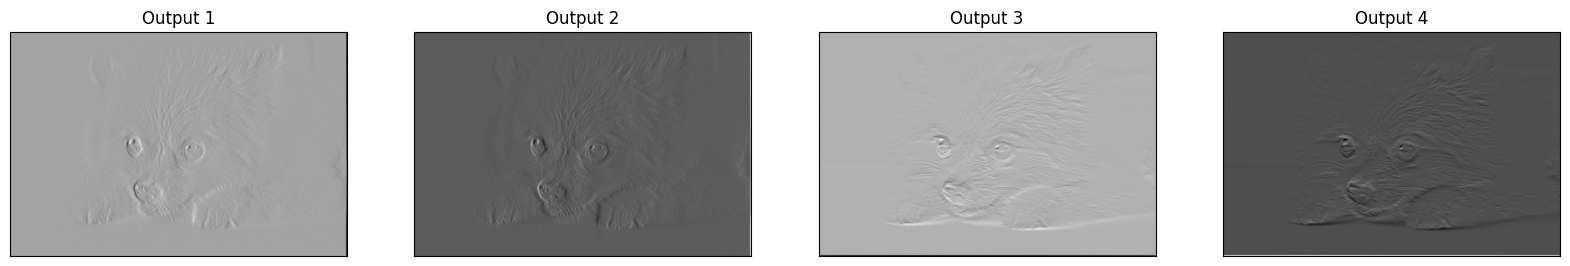

In [ ]:
# plot original image
image = images[0]
plt.imshow(image, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))


# convert the image into an input Tensor
image_tensor = torch.from_numpy(image.copy()).unsqueeze(0).unsqueeze(1)
# get the convolutional layer (pre and post activation)
conv_layer, activated_layer, pooled_layer = model(image_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

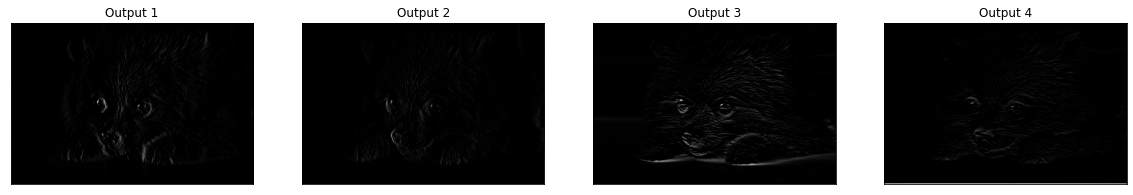

In [ ]:
# visualize the output of an activated conv layer
viz_layer(activated_layer)

https://distill.pub/2017/feature-visualization/

# 참조

---

https://anhreynolds.com/blogs/cnn.html  
https://developer.nvidia.com/discover/convolution  
https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529  
https://m.blog.naver.com/intelliz/221709291643  
https://kevinthegrey.tistory.com/147